# Mapping User Intent Through Behavior-Based Search Trends
## A system to identify emerging e-commerce intent patterns using open-source data + Power BI

### Objective: 
**To deconstruct how users search and discover products using behavior-based keywords and trends. Instead of focusing on categories like “sneakers” or “jeans,” this project focuses on why and how users shop — e.g., “free shipping,” “return policy,” “same-day delivery,” “student discount,” “ethical fashion,” “trusted reviews.”.**

### Step 1-  Keyword Selection: Group keywords by intent drivers (psychological behavior)

- **Value Seekers**: “promo codes fashion,” “student discount,” “free shipping”

- **Trust Seekers**: “ethical brands,” “return policy,” “verified reviews”

- **Convenience Seekers**: “same day delivery,” “pickup near me,” “try before you buy”

- **Skeptical Explorers**: “Temu vs Shein,” “best product review,” “Amazon fake reviews”



In [1]:
#Step 1: Install & Import Libraries

from pytrends.request import TrendReq
import pandas as pd

In [3]:
#Step 2: Initialize PyTrends

pytrends = TrendReq(hl='en-US', tz=360)


In [4]:
#Step 3: Define Your Keyword Groups

# Shopper segments
keyword_groups = {
    "Value Seekers": ["promo codes fashion", "student discount", "free shipping"],
    "Trust Seekers": ["ethical brands", "return policy", "verified reviews"],
    "Convenience Seekers": ["same day delivery", "pickup near me", "try before you buy"],
    "Skeptical Explorers": ["Temu vs Shein", "best product review", "Amazon fake reviews"]
}


### Step 2- Use the Google Trends API (via PyTrends) to fetch:

- Search volume by keyword

- Interest over time

- Geo-location (state/country level)

- Related rising queries (to predict new intents)

In [5]:
# Step 4: Fetch Google Trends Data (Past 12 Months)

all_trends = []

for segment, keywords in keyword_groups.items():
    pytrends.build_payload(keywords, cat=0, timeframe='today 12-m', geo='', gprop='')
    data = pytrends.interest_over_time()
    
    if not data.empty:
        data['segment'] = segment
        all_trends.append(data)

# Combine all data into one DataFrame
combined_trends = pd.concat(all_trends)
combined_trends.reset_index(inplace=True)


In [6]:
#Step 5: Preview the Data

combined_trends.head()


,date,promo codes fashion,student discount,free shipping,isPartial,segment,ethical brands,return policy,verified reviews,same day delivery,pickup near me,try before you buy,Temu vs Shein,best product review,Amazon fake reviews
0,2024-07-14,0.0,59.0,42.0,False,Value Seekers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-21,0.0,58.0,43.0,False,Value Seekers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-07-28,0.0,60.0,42.0,False,Value Seekers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-04,0.0,64.0,43.0,False,Value Seekers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-11,0.0,71.0,45.0,False,Value Seekers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_trends = []

for segment, keywords in keyword_groups.items():
    for kw in keywords:
        pytrends.build_payload([kw], cat=0, timeframe='today 12-m', geo='', gprop='')
        df = pytrends.interest_over_time()
        
        if not df.empty:
            df = df[[kw]].reset_index()
            df['keyword'] = kw
            df['segment'] = segment
            df.rename(columns={kw: 'value'}, inplace=True)
            all_trends.append(df)

# Combine into one long-form dataframe
combined_trends = pd.concat(all_trends)


In [8]:
combined_trends.head()


,date,value,keyword,segment
0,2024-07-14,0,promo codes fashion,Value Seekers
1,2024-07-21,0,promo codes fashion,Value Seekers
2,2024-07-28,38,promo codes fashion,Value Seekers
3,2024-08-04,0,promo codes fashion,Value Seekers
4,2024-08-11,34,promo codes fashion,Value Seekers


# Analysis

In [10]:
# Top 5 keywords with highest average interest
combined_trends.groupby("keyword")["value"].mean().sort_values(ascending=False).head()


keyword
student discount    76.679245
pickup near me      72.641509
ethical brands      64.245283
return policy       63.735849
Temu vs Shein       62.792453
Name: value, dtype: float64

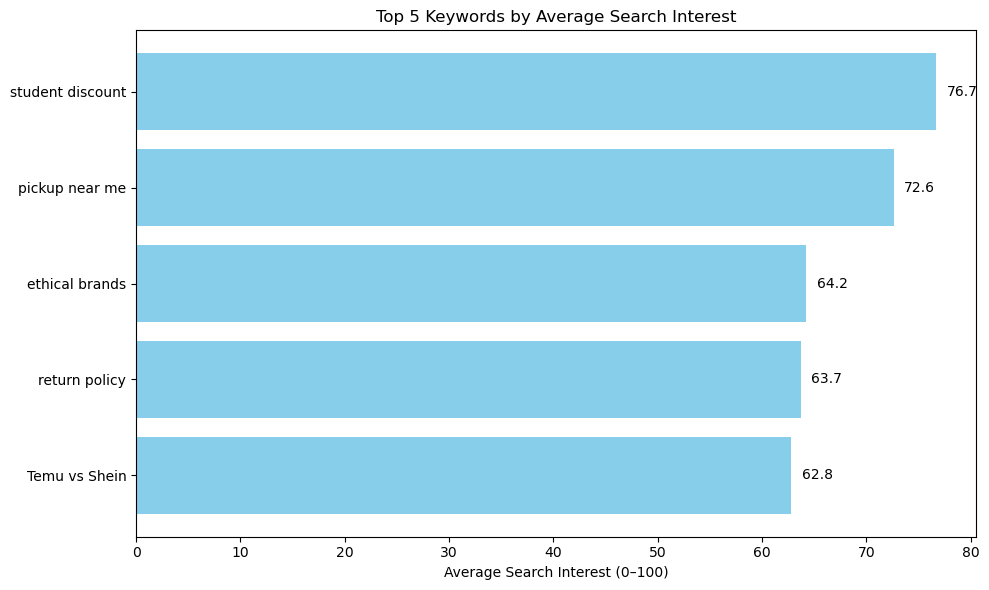

In [20]:
import matplotlib.pyplot as plt

# Data
keywords = ["student discount", "pickup near me", "ethical brands", "return policy", "Temu vs Shein"]
values = [76.68, 72.64, 64.24, 63.73, 62.79]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(keywords, values, color='skyblue')
plt.xlabel("Average Search Interest (0–100)")
plt.title("Top 5 Keywords by Average Search Interest")
plt.gca().invert_yaxis()  # To show highest value on top
plt.tight_layout()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}", va='center')

plt.show()


**This shows a clear demand for both value-oriented (discounts), trust-building (ethics, returns), and convenience-based (pickup) behavior.**

In [11]:
## Average interest by behavioral segment
combined_trends.groupby("segment")["value"].mean().sort_values(ascending=False)



segment
Trust Seekers          62.295597
Skeptical Explorers    55.635220
Convenience Seekers    51.691824
Value Seekers          45.371069
Name: value, dtype: float64

**In the current landscape, trust and credibility (returns, ethics, verified reviews) are stronger drivers of search intent than pure price incentives.**

In [12]:
# Number of missing values
combined_trends.isnull().sum()


date       0
value      0
keyword    0
segment    0
dtype: int64

In [ ]:
## Number of missing values
combined_trends.isnull().sum()



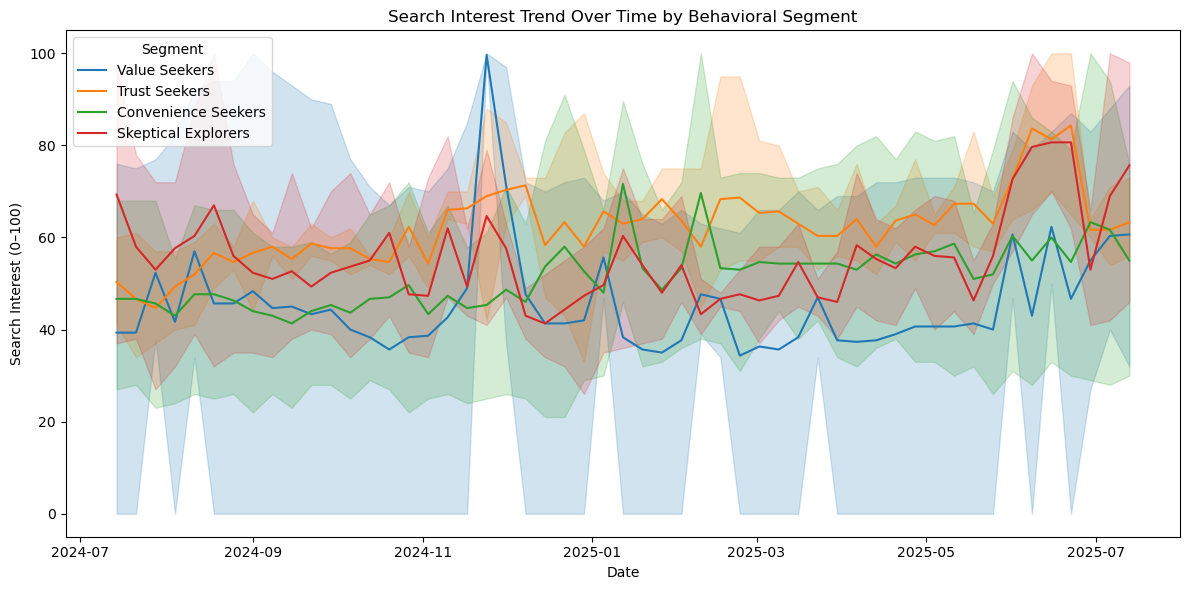

In [13]:
#Trend Over Time by Segment

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure date column is in datetime format
combined_trends['date'] = pd.to_datetime(combined_trends['date'])

# Plot average trend over time by segment
plt.figure(figsize=(12,6))
sns.lineplot(data=combined_trends, x="date", y="value", hue="segment")
plt.title("Search Interest Trend Over Time by Behavioral Segment")
plt.ylabel("Search Interest (0–100)")
plt.xlabel("Date")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()


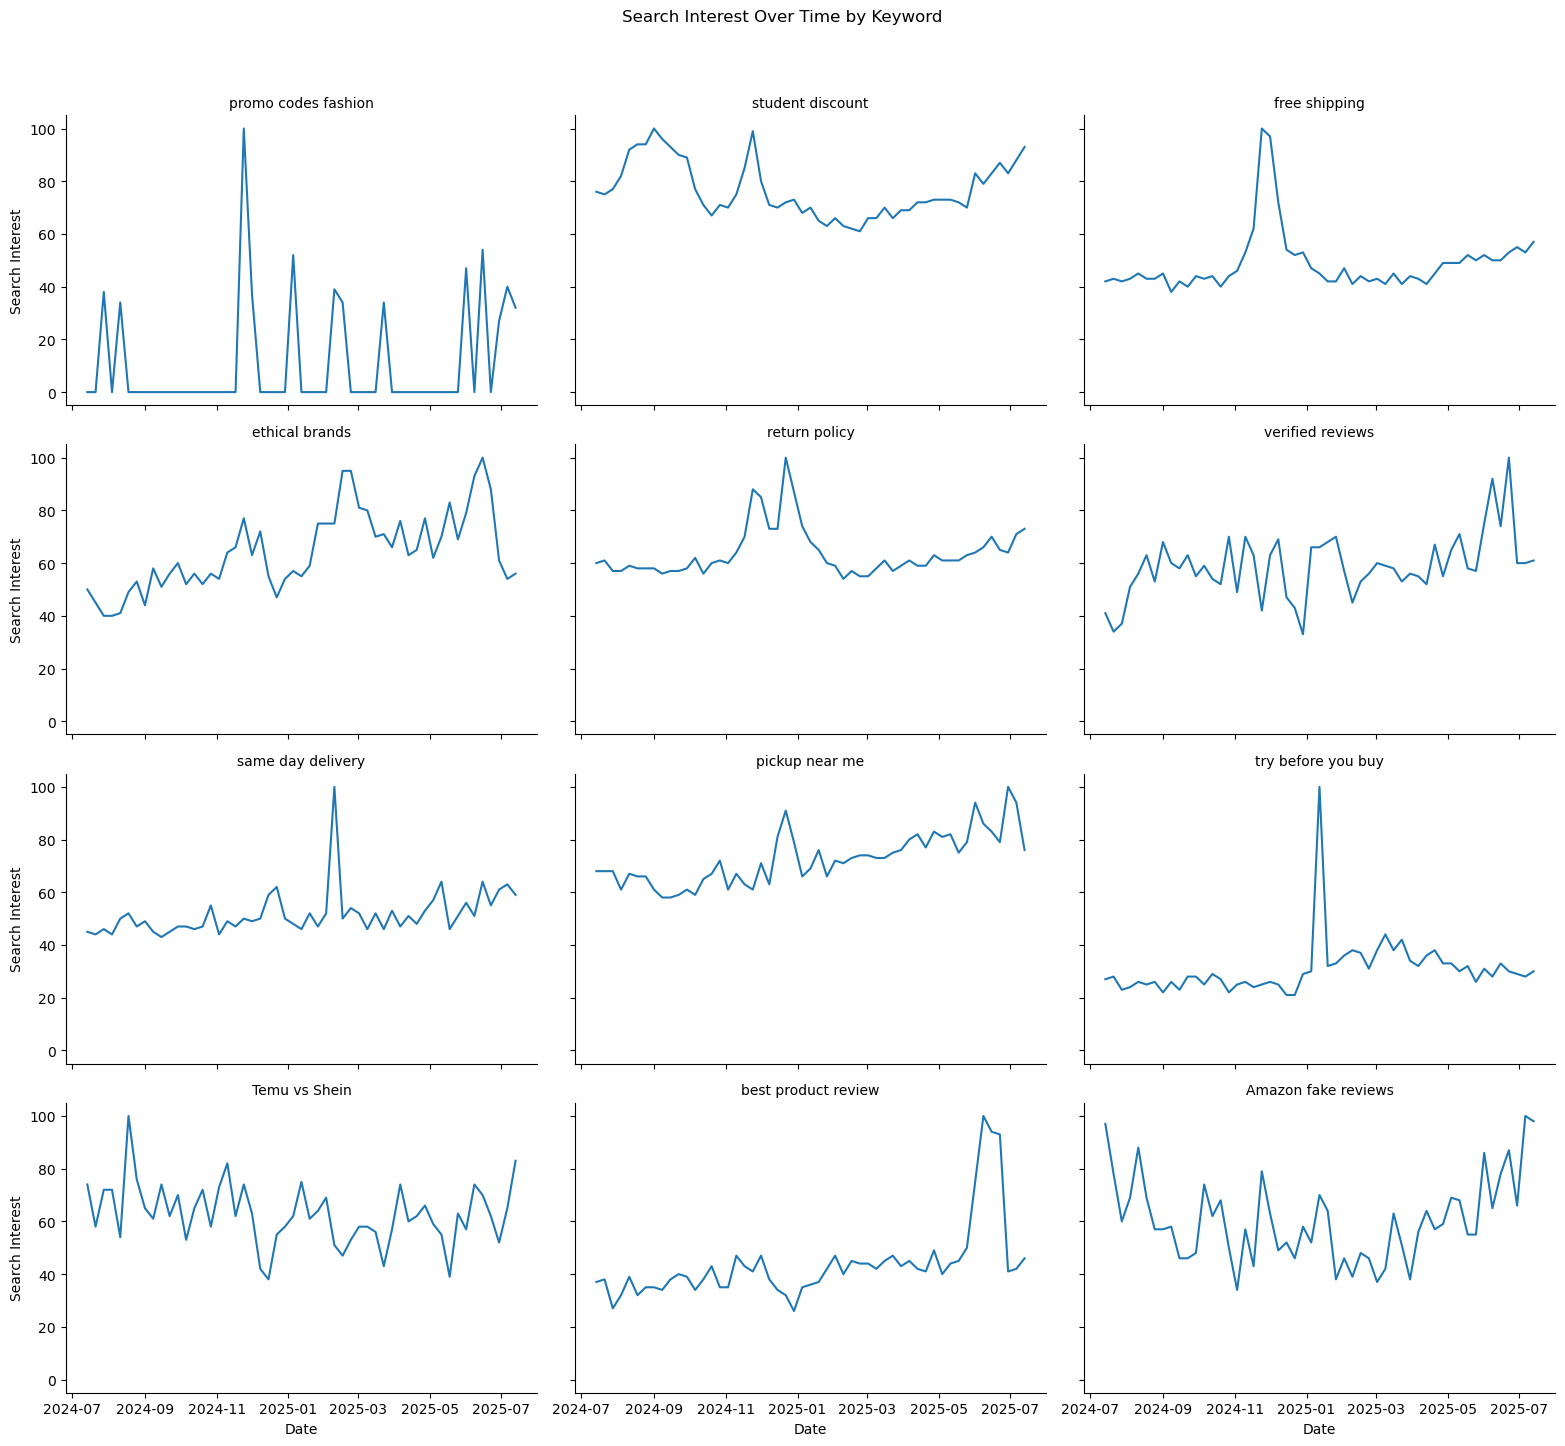

In [16]:
 #Small Multiples (Faceted Charts)
    
g = sns.FacetGrid(combined_trends, col="keyword", col_wrap=3, height=3.5, aspect=1.5)
g.map(sns.lineplot, "date", "value")
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Search Interest")
g.fig.suptitle("Search Interest Over Time by Keyword", y=1.03)
plt.tight_layout()
plt.show()




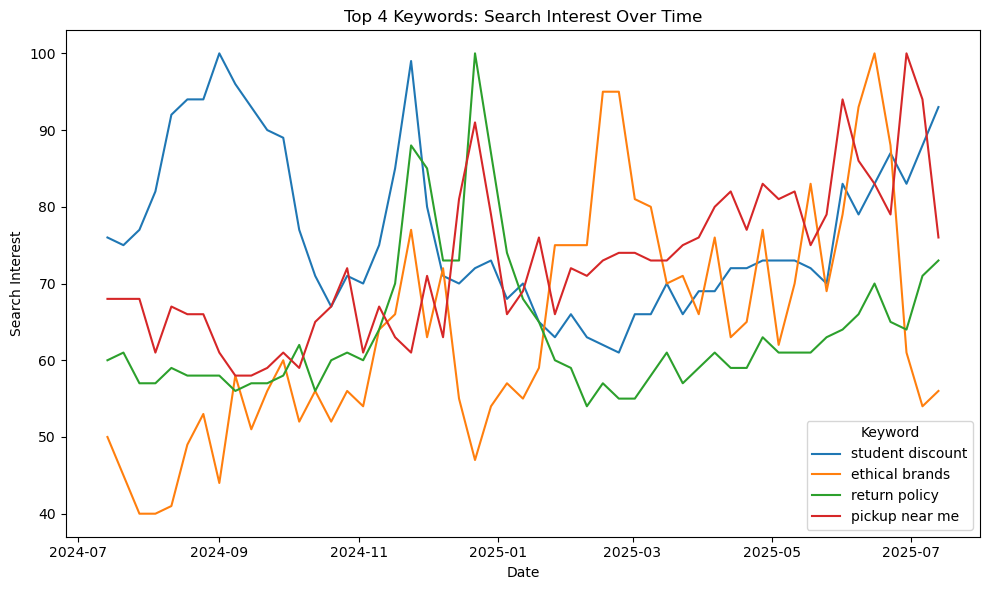

In [17]:
#Option 2: Top 4 Keywords Only

top_keywords = combined_trends.groupby("keyword")["value"].mean().sort_values(ascending=False).head(4).index
filtered = combined_trends[combined_trends["keyword"].isin(top_keywords)]

plt.figure(figsize=(10,6))
sns.lineplot(data=filtered, x="date", y="value", hue="keyword")
plt.title("Top 4 Keywords: Search Interest Over Time")
plt.ylabel("Search Interest")
plt.xlabel("Date")
plt.legend(title="Keyword")
plt.tight_layout()
plt.show()


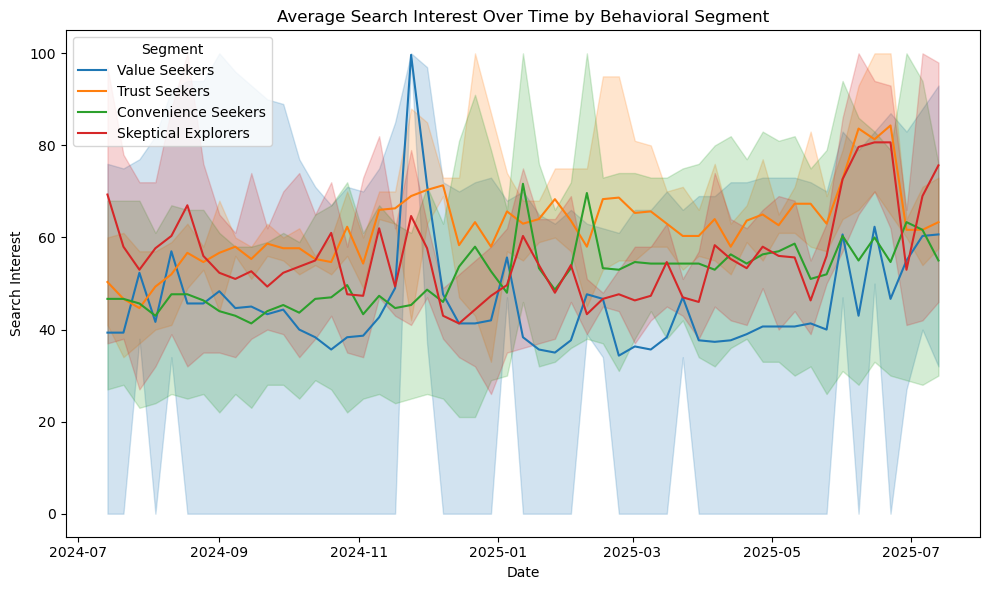

In [18]:
# Option 3: Trend by Segment (Averaged)

plt.figure(figsize=(10,6))
sns.lineplot(data=combined_trends, x="date", y="value", hue="segment")
plt.title("Average Search Interest Over Time by Behavioral Segment")
plt.ylabel("Search Interest")
plt.xlabel("Date")
plt.legend(title="Segment")
plt.tight_layout()
plt.show()


 Trust Seekers Lead in Interest
The orange line (Trust Seekers) stays consistently high, especially toward mid-2025.

This indicates rising concern for brand ethics, return policies, and verified reviews — people want to buy from brands they can trust.

2. Skeptical Explorers Are Catching Up
The red line (Skeptical Explorers) is gaining interest, especially in the later months.

Signals growing curiosity and doubt among shoppers — possibly tied to AI-generated content, fake reviews, or debates like Temu vs Shein.

Very relevant to Demand.io’s mission of building trust in shopping.

3. Convenience Seekers Stay Stable
Green line (Convenience Seekers) is relatively stable, with minor fluctuations.

Indicates a steady but not surging interest in things like pickup, fast delivery, or try-before-you-buy.

These shoppers are present — but not as emotionally driven as the Trust or Skeptical segments.

4. Value Seekers (Blue) Are Most Volatile
The blue line (Value Seekers) shows sharp spikes and dips, suggesting behavior is more seasonal or reactive (e.g. sale events).

Likely driven by promotions, student discounts, etc. — highly price-sensitive.

### Analysis-


Trust and truth are winning — users are increasingly searching for reliable, ethical, and transparent shopping cues.

Demand.io's focus on structured knowledge and trusted content (ShopGraph) is directly aligned with what people are actively seeking.

Suggests growth efforts should lean more toward empowering Trust Seekers and Skeptical Explorers, since these segments are trending upward and emotionally invested.

### Step 3- PowerBI dashboard